___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

In [172]:
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.duplicated().any()

False

In [173]:
df.drop(columns=['RowNumber', 'Surname'], axis=1, inplace=True)

In [ ]:
df.duplicated().any()

False

In [174]:
df.replace({'Male' : 1, 'Female': 0},inplace=True)

In [ ]:
df.sample(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2749,15671124,599,France,1,25,6,120383.41,1,1,1,24903.09,0
8051,15697801,605,Germany,0,56,1,74129.18,2,1,1,62199.78,1
2366,15623430,672,France,1,34,9,0.00,2,1,0,161800.77,0
362,15706365,648,France,0,50,9,102535.57,1,1,1,189543.19,0
9564,15720083,554,Spain,1,42,1,0.00,2,0,1,183492.90,0
6724,15756625,752,France,0,41,8,0.00,2,1,0,139844.04,1
7058,15671769,624,France,0,71,4,170252.05,3,1,1,73679.59,1
9138,15771668,578,France,1,59,10,185966.64,1,0,0,9445.42,1
9328,15763093,540,Germany,0,35,7,128369.75,2,1,0,198256.15,0
6181,15797194,570,France,1,39,10,129674.89,2,1,0,80552.36,0


<Axes: xlabel='Geography', ylabel='Exited'>

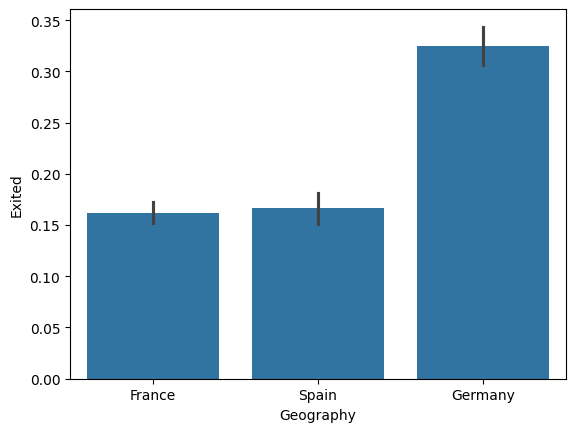

In [ ]:
sns.barplot(data=df, x='Geography', y='Exited')

<Axes: xlabel='Geography', ylabel='count'>

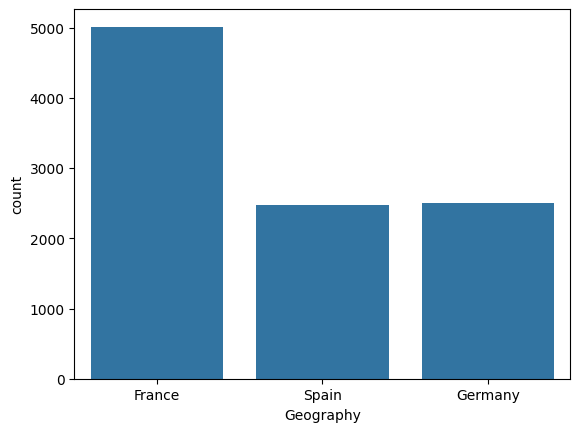

In [ ]:
sns.countplot(data=df, x='Geography')

In [175]:
df.replace({'France' : 1, 'Germany': 2, 'Spain':0 },inplace=True)

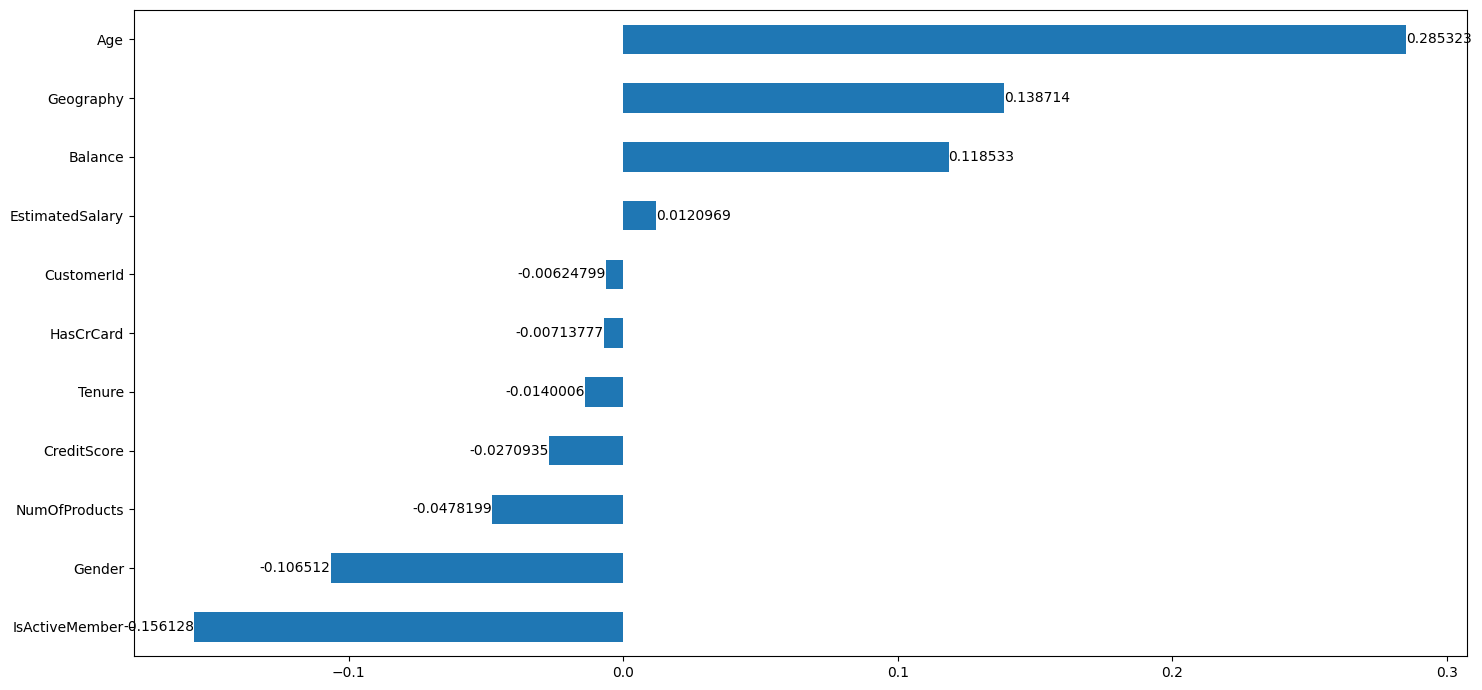

In [ ]:
plt.figure(figsize=(15, 7))
ax = df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

<Axes: >

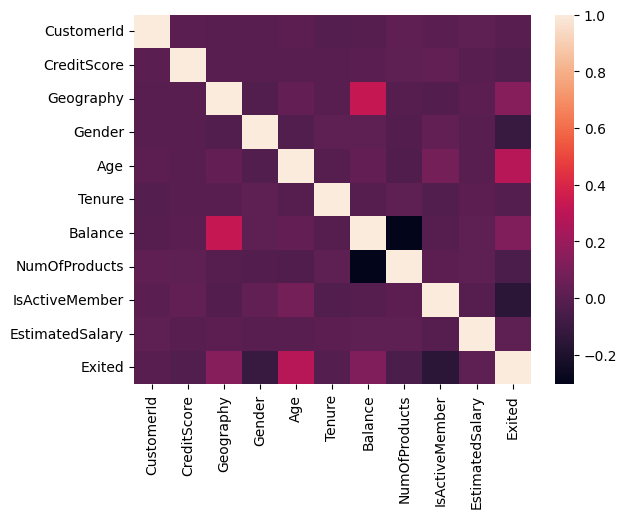

In [ ]:
sns.heatmap(data=df.corr())

In [ ]:
df.sample(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5878,15692918,604,2,1,36,10,113546.30,1,1,1,134875.37,0
5074,15672397,598,1,1,38,0,125487.89,1,0,0,158111.71,0
1005,15701602,521,2,1,52,5,116497.31,3,0,0,53793.10,1
2557,15714634,837,1,1,26,4,89900.24,2,1,0,175477.03,0
3721,15758362,731,1,0,41,9,152243.57,1,1,1,88783.59,0
8105,15635116,659,0,1,60,2,0.00,1,1,0,177480.45,1
7219,15761554,581,1,1,54,4,89299.81,1,0,0,5558.47,1
9019,15810227,421,1,1,34,2,0.00,2,1,1,96615.23,0
7559,15696120,701,0,0,30,2,0.00,2,1,0,115650.63,0
9422,15778936,701,1,1,33,9,147510.34,1,1,0,190611.92,0


In [ ]:
df.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='Exited'>

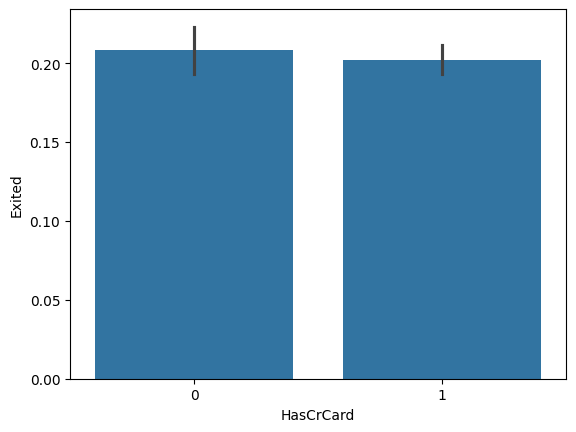

In [ ]:
sns.barplot(data=df, x='HasCrCard', y='Exited')

In [176]:
df.drop(columns=['HasCrCard'], axis=1, inplace=True)

In [ ]:
#df.drop(columns=['EstimatedSalary'], axis=1, inplace=True)   ?

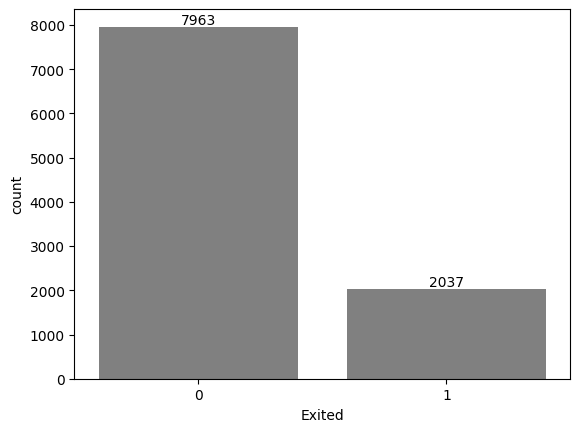

In [ ]:
ax = sns.countplot(x=df["Exited"], color="gray")
ax.bar_label(ax.containers[0]);

# Preprocessing of Data
- Train | Test Split, Scalling

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [178]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [179]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
seed = 42
keras.utils.set_random_seed(seed)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [180]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    # Input data
    X, y,
    # Testing set size
    test_size=0.2,
    # Seed for reproducibility
    random_state=seed
)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    # Training data
    X_train, y_train,
    # Validation set size
    test_size=0.2,
    # Seed for reproducibility
    random_state=seed
)

In [181]:
scaler = MinMaxScaler()

In [182]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
#from livelossplot import PlotLossesKerasTF

In [ ]:
X_train.shape

(6400, 10)

In [ ]:
X_val.shape

(1600, 10)

In [ ]:
X_test.shape

(2000, 10)

## without class_weigth

### Create The Model

In [ ]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(25, activation="relu", input_dim=X_train.shape[1]))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(10, activation="relu"))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(6, activation="relu"))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                275       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=12, epochs=500, verbose=1
)

Epoch 1/500
534/534 [==============================] - 2s 4ms/step - loss: 0.3336 - accuracy: 0.8644 - val_loss: 0.3301 - val_accuracy: 0.8600
Epoch 2/500
534/534 [==============================] - 2s 4ms/step - loss: 0.3341 - accuracy: 0.8630 - val_loss: 0.3265 - val_accuracy: 0.8550
Epoch 3/500
534/534 [==============================] - 2s 4ms/step - loss: 0.3337 - accuracy: 0.8623 - val_loss: 0.3322 - val_accuracy: 0.8612
Epoch 4/500
534/534 [==============================] - 2s 4ms/step - loss: 0.3331 - accuracy: 0.8631 - val_loss: 0.3313 - val_accuracy: 0.8612
Epoch 5/500
534/534 [==============================] - 3s 6ms/step - loss: 0.3330 - accuracy: 0.8647 - val_loss: 0.3299 - val_accuracy: 0.8569
Epoch 6/500
534/534 [==============================] - 2s 4ms/step - loss: 0.3320 - accuracy: 0.8645 - val_loss: 0.3331 - val_accuracy: 0.8619
Epoch 7/500
534/534 [==============================] - 2s 4ms/step - loss: 0.3339 - accuracy: 0.8661 - val_loss: 0.3282 - val_accuracy: 0.8594

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.333610,0.864375,0.330086,0.860000
1,0.334119,0.862969,0.326530,0.855000
2,0.333683,0.862344,0.332203,0.861250
3,0.333139,0.863125,0.331266,0.861250
4,0.332991,0.864688,0.329865,0.856875


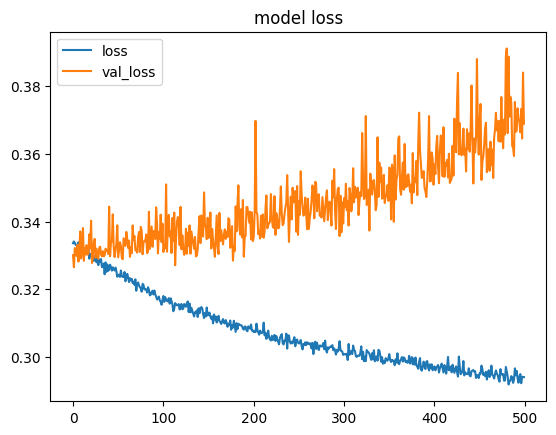

Text(0.5, 1.0, 'model accuracy')

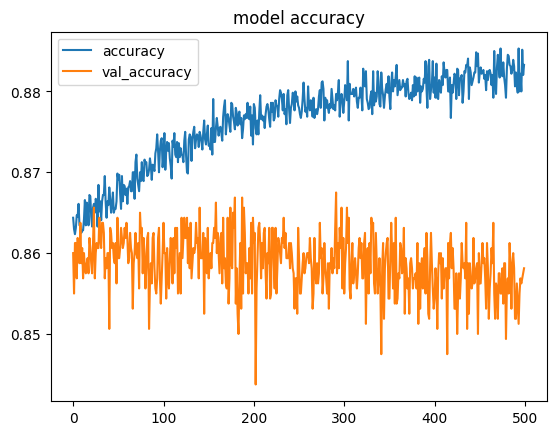

In [ ]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["accuracy", "val_accuracy"]].plot()
plt.title("model accuracy")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.38835325837135315
accuracy:  0.8535000085830688


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1531   76]
 [ 217  176]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.45      0.55       393

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(26, activation="relu", input_dim=X_train.shape[1]))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(12, activation="relu"))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 26)                286       
                                                                 
 dense_21 (Dense)            (None, 12)                324       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 723 (2.82 KB)
Trainable params: 723 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=12, epochs=500, verbose=1, class_weight ={0: 1, 1: 4}
)

Epoch 1/500
534/534 [==============================] - 4s 4ms/step - loss: 1.0749 - accuracy: 0.5475 - val_loss: 0.5383 - val_accuracy: 0.7481
Epoch 2/500
534/534 [==============================] - 2s 4ms/step - loss: 0.9858 - accuracy: 0.6527 - val_loss: 0.6283 - val_accuracy: 0.6575
Epoch 3/500
534/534 [==============================] - 2s 4ms/step - loss: 0.9514 - accuracy: 0.6833 - val_loss: 0.5471 - val_accuracy: 0.7344
Epoch 4/500
534/534 [==============================] - 3s 6ms/step - loss: 0.9204 - accuracy: 0.7050 - val_loss: 0.5754 - val_accuracy: 0.7144
Epoch 5/500
534/534 [==============================] - 2s 4ms/step - loss: 0.8832 - accuracy: 0.7262 - val_loss: 0.5086 - val_accuracy: 0.7713
Epoch 6/500
534/534 [==============================] - 2s 4ms/step - loss: 0.8416 - accuracy: 0.7411 - val_loss: 0.5589 - val_accuracy: 0.7256
Epoch 7/500
534/534 [==============================] - 2s 4ms/step - loss: 0.8196 - accuracy: 0.7477 - val_loss: 0.4494 - val_accuracy: 0.7969

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.074864,0.547500,0.538274,0.748125
1,0.985826,0.652656,0.628273,0.657500
2,0.951395,0.683281,0.547082,0.734375
3,0.920410,0.705000,0.575414,0.714375
4,0.883194,0.726250,0.508580,0.771250


#good for recall

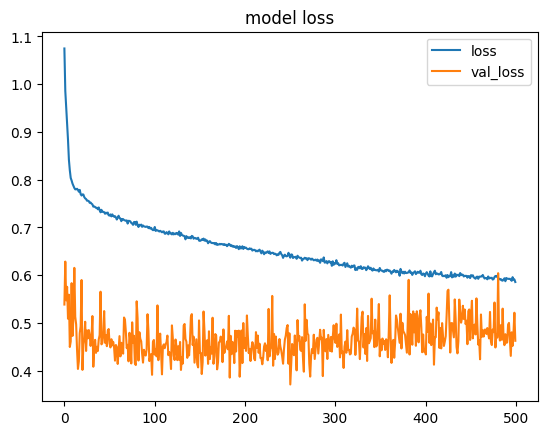

Text(0.5, 1.0, 'model accuracy')

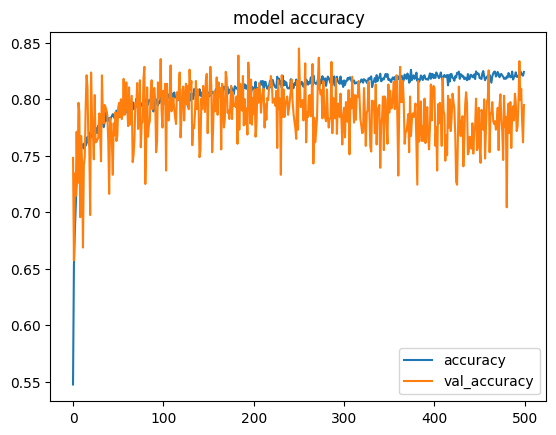

In [ ]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["accuracy", "val_accuracy"]].plot()
plt.title("model accuracy")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4965815842151642
accuracy:  0.7904999852180481


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1305  302]
 [ 117  276]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1607
           1       0.48      0.70      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [186]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(26, activation="relu", input_dim=X_train.shape[1]))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(12, activation="relu"))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=12, epochs=500, verbose=1, class_weight ={0: 1, 1: 4}
)

Epoch 1/500
534/534 [==============================] - 4s 5ms/step - loss: 1.0007 - accuracy: 0.6648 - val_loss: 0.5045 - val_accuracy: 0.7694
Epoch 2/500
534/534 [==============================] - 3s 5ms/step - loss: 0.8908 - accuracy: 0.7183 - val_loss: 0.4583 - val_accuracy: 0.7819
Epoch 3/500
534/534 [==============================] - 2s 4ms/step - loss: 0.8265 - accuracy: 0.7462 - val_loss: 0.6432 - val_accuracy: 0.6762
Epoch 4/500
534/534 [==============================] - 2s 4ms/step - loss: 0.8036 - accuracy: 0.7583 - val_loss: 0.5104 - val_accuracy: 0.7425
Epoch 5/500
534/534 [==============================] - 2s 4ms/step - loss: 0.7941 - accuracy: 0.7575 - val_loss: 0.4318 - val_accuracy: 0.7987
Epoch 6/500
534/534 [==============================] - 2s 4ms/step - loss: 0.7856 - accuracy: 0.7716 - val_loss: 0.5098 - val_accuracy: 0.7613
Epoch 7/500
534/534 [==============================] - 3s 6ms/step - loss: 0.7845 - accuracy: 0.7683 - val_loss: 0.4128 - val_accuracy: 0.8231

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.000744,0.664844,0.504540,0.769375
1,0.890815,0.718281,0.458260,0.781875
2,0.826488,0.746250,0.643233,0.676250
3,0.803610,0.758281,0.510353,0.742500
4,0.794051,0.757500,0.431815,0.798750


c

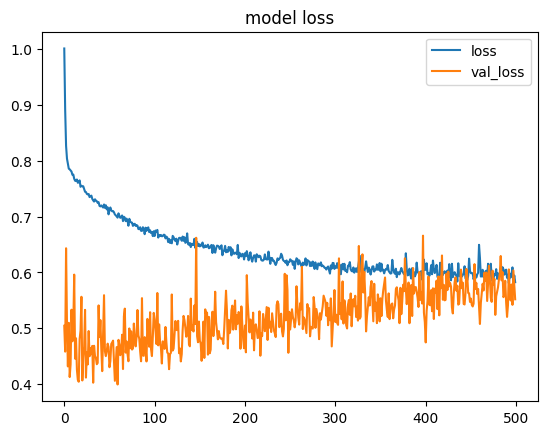

Text(0.5, 1.0, 'model accuracy')

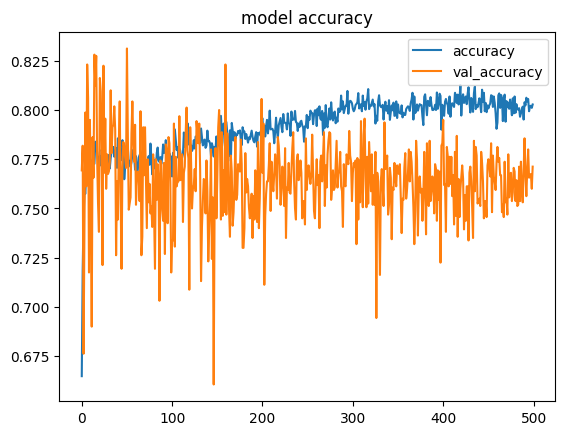

In [ ]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["accuracy", "val_accuracy"]].plot()
plt.title("model accuracy")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.46748775243759155
accuracy:  0.7985000014305115


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Dropout Layer

In [187]:
from tensorflow.keras.layers import Dropout

In [ ]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(26, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(8, activation="relu"))


# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=12, epochs=500, verbose=1, class_weight ={0: 1, 1: 4}
)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

In [ ]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["accuracy", "val_accuracy"]].plot()
plt.title("model accuracy")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Add Early Stop

In [188]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(26, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(8, activation="relu"))


# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=120, restore_best_weights=True
)

In [ ]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=12, epochs=200, verbose=1, class_weight ={0: 1, 1: 0.8}, callbacks=[early_stop]
)

Epoch 1/200
534/534 [==============================] - 4s 5ms/step - loss: 0.4750 - accuracy: 0.7792 - val_loss: 0.4753 - val_accuracy: 0.7956
Epoch 2/200
534/534 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.7942 - val_loss: 0.4559 - val_accuracy: 0.7956
Epoch 3/200
534/534 [==============================] - 2s 3ms/step - loss: 0.4089 - accuracy: 0.7947 - val_loss: 0.4374 - val_accuracy: 0.7956
Epoch 4/200
534/534 [==============================] - 2s 3ms/step - loss: 0.3996 - accuracy: 0.8006 - val_loss: 0.4248 - val_accuracy: 0.8000
Epoch 5/200
534/534 [==============================] - 2s 3ms/step - loss: 0.3903 - accuracy: 0.8055 - val_loss: 0.4127 - val_accuracy: 0.8075
Epoch 6/200
534/534 [==============================] - 2s 3ms/step - loss: 0.3822 - accuracy: 0.8127 - val_loss: 0.3952 - val_accuracy: 0.8288
Epoch 7/200
534/534 [==============================] - 2s 4ms/step - loss: 0.3703 - accuracy: 0.8197 - val_loss: 0.3952 - val_accuracy: 0.8206

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.474958,0.779219,0.475272,0.795625
1,0.425229,0.794219,0.455892,0.795625
2,0.408904,0.794688,0.437355,0.795625
3,0.399565,0.800625,0.424759,0.800000
4,0.390316,0.805469,0.412693,0.807500


# good for precision

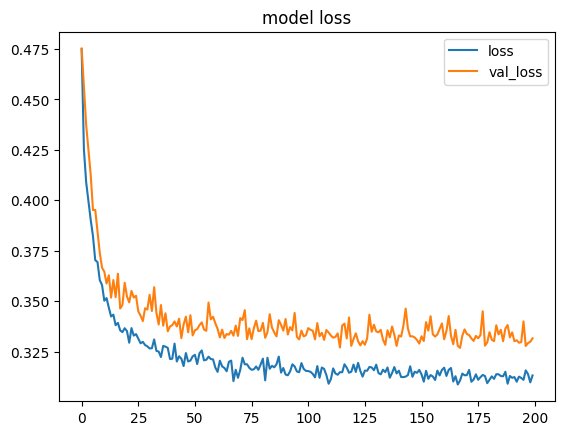

Text(0.5, 1.0, 'model accuracy')

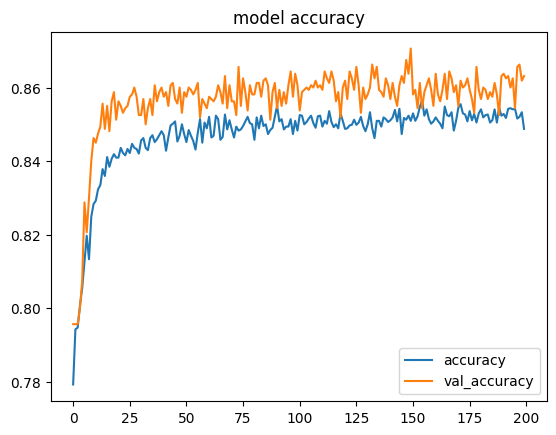

In [ ]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["accuracy", "val_accuracy"]].plot()
plt.title("model accuracy")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3373667299747467
accuracy:  0.8600000143051147


In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1558   49]
 [ 231  162]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.41      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



63/63 [==============================] - 0s 1ms/step
[[1305  302]
 [ 117  276]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1607
           1       0.48      0.70      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000

For recall

In [142]:
# Multi-line comment explaining the entire code
"""
This code defines a Sequential neural network model for binary classification.
The model architecture consists of:
- An input layer with 36 neurons
- Two hidden layers with 18 and 9 neurons respectively
- An output layer with 1 neuron for binary classification
All layers except the output use ReLU activation, while the output uses sigmoid.
The model is compiled with Adam optimizer and binary crossentropy loss function.
"""

# Initialize a Sequential model
model = Sequential()

# Add the input layer with 36 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model.add(Dense(26, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

# Add the first hidden layer with 18 neurons and ReLU activation
model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

# Add the second hidden layer with 9 neurons and ReLU activation
model.add(Dense(8, activation="relu"))


# Add the output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics='Recall')

In [149]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=200, restore_best_weights=True
)

In [150]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=12, epochs=700, verbose=1, class_weight ={0: 1, 1: 4}, callbacks=[early_stop]
)

Epoch 1/700
534/534 [==============================] - 2s 3ms/step - loss: 0.9327 - recall: 0.6401 - val_loss: 0.4725 - val_recall: 0.6422
Epoch 2/700
534/534 [==============================] - 2s 3ms/step - loss: 0.8867 - recall: 0.6826 - val_loss: 0.5018 - val_recall: 0.7829
Epoch 3/700
534/534 [==============================] - 1s 3ms/step - loss: 0.8848 - recall: 0.6811 - val_loss: 0.4979 - val_recall: 0.7798
Epoch 4/700
534/534 [==============================] - 2s 3ms/step - loss: 0.8713 - recall: 0.7084 - val_loss: 0.5318 - val_recall: 0.8471
Epoch 5/700
534/534 [==============================] - 2s 3ms/step - loss: 0.8723 - recall: 0.7342 - val_loss: 0.4857 - val_recall: 0.7890
Epoch 6/700
534/534 [==============================] - 2s 5ms/step - loss: 0.8694 - recall: 0.7069 - val_loss: 0.4891 - val_recall: 0.8104
Epoch 7/700
534/534 [==============================] - 2s 3ms/step - loss: 0.8650 - recall: 0.7236 - val_loss: 0.4860 - val_recall: 0.7829
Epoch 8/700
534/534 [======

In [151]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.932668,0.640091,0.472531,0.642202
1,0.886678,0.682612,0.501830,0.782875
2,0.884832,0.681093,0.497943,0.779817
3,0.871328,0.708428,0.531845,0.847095
4,0.872317,0.734244,0.485686,0.788991


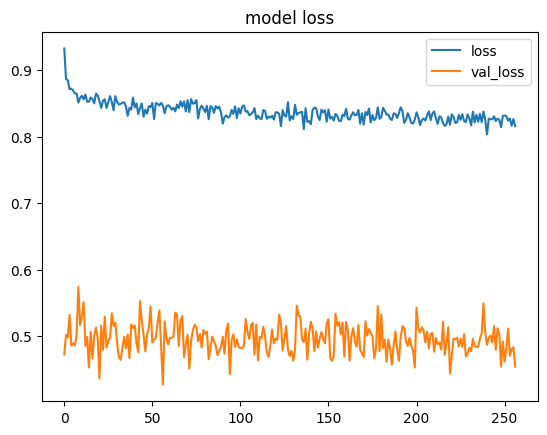

Text(0.5, 1.0, 'model recall')

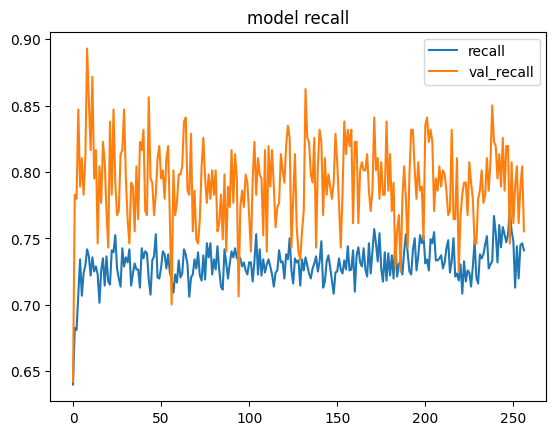

In [152]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["recall", "val_recall"]].plot()
plt.title("model recall")

In [153]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4379449188709259
recall:  0.6895674467086792


In [154]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1383  224]
 [ 122  271]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.55      0.69      0.61       393

    accuracy                           0.83      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.85      0.83      0.83      2000



#### Monitor the "val_loss" as metric

In [155]:
wal_loss, recall = model.evaluate(X_val, y_val, verbose=0)
print("val_loss: ", loss)


val_loss:  0.4379449188709259


#### Monitor the "val_recall" as metric

In [156]:
wal_loss, recall = model.evaluate(X_val, y_val, verbose=0)
print("recall: ", recall)

recall:  0.7003058195114136


## Optuna

In [189]:
!pip install optuna

In [190]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [191]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [214]:
trial_metric = "accuracy"
batch_size = 55


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 16)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [215]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2024-07-23 15:45:52,514] A new study created in memory with name: no-name-b83f7b06-71cc-4089-856d-39158dbc14b8
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2024-07-23 15:46:04,820] Trial 0 finished with value: 0.1965000033378601 and parameters: {'n_units1': 43, 'n_units2': 93, 'n_units3': 14, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.06063437714993205, 'w0': 0.05622652088618813, 'w1': 2.517664937145871}. Best is trial 0 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2024-07-23 15:46:21,998] Trial 1 finished with value: 0.35499998927116394 and parameters: {'n_units1': 127, 'n_units2': 9, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.004190518527982961, 'w0': 0.08651191011223673, 'w1': 4.496957770999928}. Best is trial 1 with value: 0.35499998927116394.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2024-07-23 15:46:34,231] Trial 2 finished with value: 0.862500011920929 and parameters: {'n_units1': 69, 'n_units2': 113, 'n_units3': 16, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.019128908826289127, 'w0': 0.17458961262215406, 'w1': 0.05761269033423979}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2024-07-23 15:46:45,350] Trial 3 finished with value: 0.8034999966621399 and parameters: {'n_units1': 22, 'n_units2': 52, 'n_units3': 12, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.727781729610054e-05, 'w0': 2.4563120597170025, 'w1': 0.11572478407029053}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2024-07-23 15:46:58,775] Trial 4 finished with value: 0.8034999966621399 and parameters: {'n_units1': 33, 'n_units2': 77, 'n_units3': 16, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.06608126312878347, 'w0': 0.5982343009446497, 'w1': 0.010858453800632717}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2024-07-23 15:47:08,609] Trial 5 finished with value: 0.8034999966621399 and parameters: {'n_units1': 25, 'n_units2': 20, 'n_units3': 15, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 4.396331898207042e-05, 'w0': 1.7554245252568796, 'w1': 0.5065996232859721}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2024-07-23 15:47:15,910] Trial 6 finished with value: 0.8034999966621399 and parameters: {'n_units1': 54, 'n_units2': 47, 'n_units3': 15, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.1286972513490958, 'w0': 0.07301612527272948, 'w1': 0.23325593476818612}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2024-07-23 15:47:29,786] Trial 7 finished with value: 0.4259999990463257 and parameters: {'n_units1': 86, 'n_units2': 29, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0038305368948105345, 'w0': 0.014556505527873789, 'w1': 0.6868640690302468}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2024-07-23 15:47:37,152] Trial 8 finished with value: 0.33149999380111694 and parameters: {'n_units1': 34, 'n_units2': 57, 'n_units3': 15, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 3.717862751015357e-05, 'w0': 0.030301086224672927, 'w1': 3.264365563976204}. Best is trial 2 with value: 0.862500011920929.


Restoring model weights from the end of the best epoch: 56.
Epoch 71: early stopping


[I 2024-07-23 15:48:19,121] Trial 9 finished with value: 0.8065000176429749 and parameters: {'n_units1': 124, 'n_units2': 91, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00036101259515700866, 'w0': 0.015894670350981233, 'w1': 0.06305312529440843}. Best is trial 2 with value: 0.862500011920929.


{'n_units1': 69,
 'n_units2': 113,
 'n_units3': 16,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.019128908826289127,
 'w0': 0.17458961262215406,
 'w1': 0.05761269033423979}

In [216]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=55,
    epochs=250,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/250
117/117 [==============================] - 2s 5ms/step - loss: 0.4636 - recall: 0.0995 - val_loss: 0.4124 - val_recall: 0.2783
Epoch 2/250
117/117 [==============================] - 0s 3ms/step - loss: 0.4019 - recall: 0.3166 - val_loss: 0.3736 - val_recall: 0.2110
Epoch 3/250
117/117 [==============================] - 0s 3ms/step - loss: 0.3838 - recall: 0.3349 - val_loss: 0.3686 - val_recall: 0.4465
Epoch 4/250
117/117 [==============================] - 0s 3ms/step - loss: 0.3680 - recall: 0.3789 - val_loss: 0.3562 - val_recall: 0.4709
Epoch 5/250
117/117 [==============================] - 0s 3ms/step - loss: 0.3640 - recall: 0.3903 - val_loss: 0.3469 - val_recall: 0.3884
Epoch 6/250
117/117 [==============================] - 0s 3ms/step - loss: 0.3610 - recall: 0.3903 - val_loss: 0.3537 - val_recall: 0.4557
Epoch 7/250
117/117 [==============================] - 0s 3ms/step - loss: 0.3661 - recall: 0.3850 - val_loss: 0.3466 - val_recall: 0.3792
Epoch 8/250
117/117 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [217]:
history = model.history.history

In [219]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.463606,0.099468,0.412421,0.278287
1,0.401908,0.316629,0.373609,0.211009
2,0.383784,0.334852,0.368616,0.446483
3,0.368020,0.378891,0.356246,0.470948
4,0.363984,0.390281,0.346897,0.388379


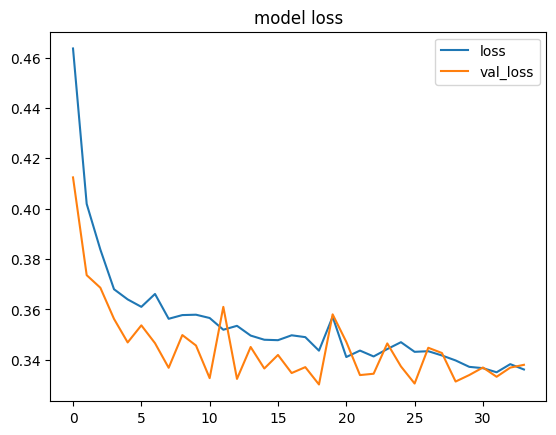

Text(0.5, 1.0, 'model recall')

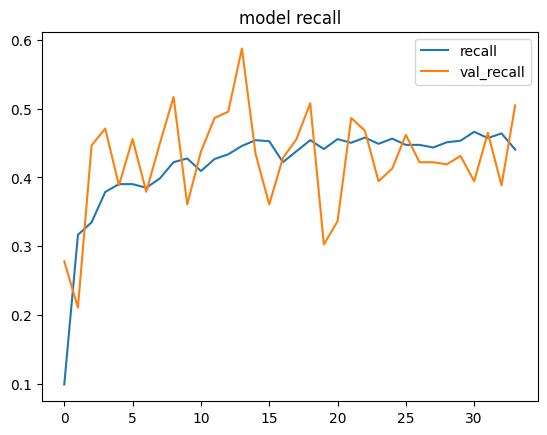

In [220]:
loss_df[["loss", "val_loss"]].plot()
plt.title("model loss")
plt.show()
loss_df[["recall", "val_recall"]].plot()
plt.title("model recall")

In [221]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.339422345161438
accuracy:  0.5038167834281921


In [222]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1526   81]
 [ 195  198]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 3ms/step


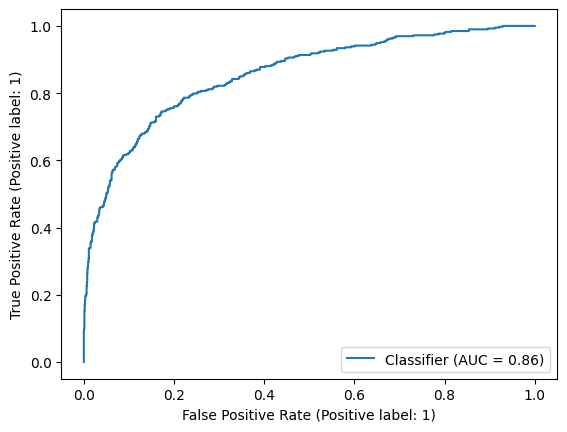

In [223]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Final Model and Model Deployment

In [224]:
import pickle

pickle.dump(scaler, open("scaler_exit", "wb"))

<Axes: >

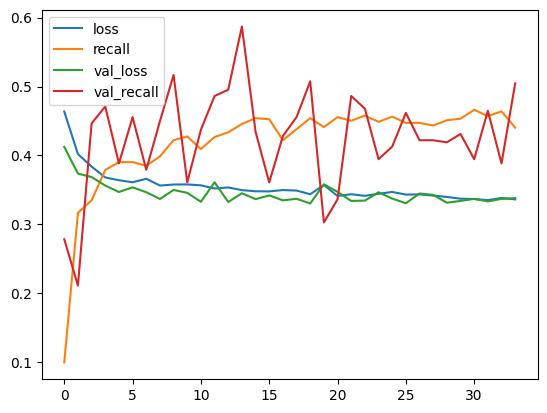

In [225]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [226]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.339422345161438
recall:  0.5038167834281921


In [227]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1526   81]
 [ 195  198]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [228]:
model.save("model_bank_exit.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [229]:
from tensorflow.keras.models import load_model

In [230]:
model_bank_exit = load_model("model_bank_exit.h5")
scaler_exit = pickle.load(open("scaler_exit", "rb"))

In [240]:
bank_sample_exit = df.drop("Exited", axis=1).iloc[4:5, :]
bank_sample_exit

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
4,15737888,850,0,0,43,2,125510.82,1,1,79084.1


In [236]:
bank_sample_exit = scaler_exit.transform(bank_sample_exit)
bank_sample_exit

array([[0.68885475, 1.        , 0.        , 0.        , 0.38461538,
        0.2       , 0.52649903, 0.        , 1.        , 0.39520595]])

In [237]:
(model_bank_exit.predict(bank_sample_exit) > 0.5).astype("int32")

1/1 [==============================] - 0s 29ms/step


array([[0]], dtype=int32)

In [238]:
df["Exited"].iloc[4]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___